In [1]:
import numpy as np
import random

from TennisRPG import *

In [2]:
dico = Personnage.generer_pnj(10,"m")
classement = Classement.Classement(dico, preliminaire=True)

In [3]:
dico

{'Salvador Martins': <TennisRPG.Personnage.Personnage at 0x24c632cc410>,
 'Marcin Ciesiółka': <TennisRPG.Personnage.Personnage at 0x24c633ce000>,
 'Napoleon Gregoropoulos': <TennisRPG.Personnage.Personnage at 0x24c633584d0>,
 'Ermes Gonzaga': <TennisRPG.Personnage.Personnage at 0x24c6374ac60>,
 'Damiano Stefanelli': <TennisRPG.Personnage.Personnage at 0x24c63457290>,
 'Aleks Babič': <TennisRPG.Personnage.Personnage at 0x24c63862960>,
 'Ling  Zhong Cun ': <TennisRPG.Personnage.Personnage at 0x24c6391edb0>,
 'Glenn Gilhooly': <TennisRPG.Personnage.Personnage at 0x24c6395b050>,
 'Pilip Ljashko': <TennisRPG.Personnage.Personnage at 0x24c633d5a60>,
 'Ernest Vidovič': <TennisRPG.Personnage.Personnage at 0x24c6395b200>}

In [4]:
dico["Salvador Martins"].id_card(classement)

┌────────────────────────────────────────────┐
│                  ID CARD                   │
├────────────────────────────────────────────┤
│ Nom     : Martins                          │
│ Prénom  : Salvador                         │
│ Taille  : 195 cm                           │
│ Nationalité  : Portugal                    │
│ Main    : Droite                           │
│ Revers  : Deux mains                       │
├────────────────────────────────────────────┤
│                 SITUATION                  │
├────────────────────────────────────────────┤
│ Classement  ATP  : 6                       │
│ Points ATP  : 0                            │
│ ELO     : 1200                             │
│ Niveau  : 1                                │
│ XP      : ░░░░░░░░░░░░░░░░░░░░       0/200 │
│ Fatigue : 0                                │
│ Blessure: False │
├────────────────────────────────────────────┤
│                STATISTIQUES                │
├───────────────────────────────────────

In [5]:
dico["Ermes Gonzaga"].id_card(classement)

┌────────────────────────────────────────────┐
│                  ID CARD                   │
├────────────────────────────────────────────┤
│ Nom     : Gonzaga                          │
│ Prénom  : Ermes                            │
│ Taille  : 179 cm                           │
│ Nationalité  : Italy                       │
│ Main    : Droite                           │
│ Revers  : Deux mains                       │
├────────────────────────────────────────────┤
│                 SITUATION                  │
├────────────────────────────────────────────┤
│ Classement  ATP  : 7                       │
│ Points ATP  : 0                            │
│ ELO     : 1048                             │
│ Niveau  : 11                               │
│ XP      : ░░░░░░░░░░░░░░░░░░░░      0/3553 │
│ Fatigue : 0                                │
│ Blessure: False │
├────────────────────────────────────────────┤
│                STATISTIQUES                │
├───────────────────────────────────────

In [7]:
tournoi = Tournois.ATPFinals("ATP Finals", "Moscow", 10, 1000)
Tournois.Tournoi.simuler_match(tournoi, dico["Salvador Martins"], dico["Ermes Gonzaga"])

AttributeError: 'Personnage' object has no attribute 'peut_jouer'

In [435]:
classement

In [125]:
%%timeit
random.randint(1, 3)

309 ns ± 13.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [126]:
%%timeit
np.random.randint(1,3)

1.25 μs ± 10 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [121]:
joueur1_elo = 2246.4 #Alcaraz
joueur2_elo = 1972.3 #Dimitrov
sets_gagnants = 2 # tournoi atp classique

# Proba que le joueur 1 gagne
proba1 = 1 / (1 + 10 ** ((joueur2_elo - joueur1_elo) / 400))

proba1

# tirage = np.random.rand(1000)

sets_joueur1, sets_joueur2 = 0, 0

# Reprendre pour une gestion de match au niveau du jeu et pas du set
while max(sets_joueur1, sets_joueur2) < sets_gagnants:
	if random() < proba1:
		sets_joueur1 += 1
	else:
		sets_joueur2 += 1

sets_joueur1, sets_joueur2

(2, 1)

In [14]:
sets_joueur1, sets_joueur2

(2, 0)

In [313]:
100 * 100

10000

In [362]:
def probas_participer(classement, fatigue, cat):
	# ---- 1. Score de motivation (0.0 – 1.0) ---------------------------
	if cat == 1:  # Grand Chelem : tout le monde veut jouer
		motivation = 1.0
	elif cat == 2:  # Masters 1000
		motivation = 1.0
	elif cat == 3:  # ATP 500
		motivation = 0.5
	elif cat == 4:  # ATP 250
		motivation = 0.25
	else:  # Challengers (cat >= 5)
		motivation = 0.1

	# ---- 2. Malus de fatigue ------------------------------------------
	#   Fatigue ≤ 40      : 0
	#   40 < f ≤ 60       : -0.10
	#   60 < f ≤ 75       : -0.25
	#   75 < f ≤ 85       : -0.40
	#   85 < f ≤ 95       : -0.60
	#   f > 95            : -1.00 (forfait assuré)
	f = fatigue
	if f <= 40:
		malus = 0.0
	elif f <= 60:
		malus = -0.10
	elif f <= 75:
		malus = -0.25
	elif f <= 85:
		malus = -0.40
	elif f <= 95:
		malus = -0.60
	else:
		malus = -1.0

	return max(0.0, min(1.0, motivation + malus))

In [352]:
import pandas as pd

fatigue = [5*i for i in range(0,21)]
classement = [1+10*j for j in range(0,100)]
data = [[probas_participer(j,i, cat=4) for i in fatigue] for j in classement]

df = pd.DataFrame(data, index=classement, columns=fatigue)
df

,0,5,10,15,20,25,30,35,40,45,...,55,60,65,70,75,80,85,90,95,100
1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.4,...,0.4,0.4,0.25,0.25,0.25,0.1,0.1,0.0,0.0,0.0
11,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.4,...,0.4,0.4,0.25,0.25,0.25,0.1,0.1,0.0,0.0,0.0
21,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.6,...,0.6,0.6,0.45,0.45,0.45,0.3,0.3,0.1,0.1,0.0
31,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.6,...,0.6,0.6,0.45,0.45,0.45,0.3,0.3,0.1,0.1,0.0
41,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.6,...,0.6,0.6,0.45,0.45,0.45,0.3,0.3,0.1,0.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.8,...,0.8,0.8,0.65,0.65,0.65,0.5,0.5,0.3,0.3,0.0
961,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.8,...,0.8,0.8,0.65,0.65,0.65,0.5,0.5,0.3,0.3,0.0
971,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.8,...,0.8,0.8,0.65,0.65,0.65,0.5,0.5,0.3,0.3,0.0
981,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.8,...,0.8,0.8,0.65,0.65,0.65,0.5,0.5,0.3,0.3,0.0


In [348]:
df.loc[i,j]

np.int64(0)

In [361]:
np.exp(1 - 1000/1000)

np.float64(1.0)

## Motivation des joueurs

In [409]:
import numpy as np

# Paramètres de base
N_PLAYERS = 1000
F_MAX     = 100   # échelle max de fatigue
k         = 0.5   # sensibilité à la fatigue
alpha     = 1.0   # pondération du classement

tier_weight = {
	'GrandChelem': 1.0,
	'Masters1000': 0.9,
	'ATP500':     0.7,
	'ATP250':     0.5
}
def participation_prob(ranking, fatigue, tier,
					   N=N_PLAYERS, f_max=F_MAX,
					   k=k, alpha=alpha):
	# Normalisations
	r_norm = (ranking - 1) / (N - 1)
	f_norm = fatigue / f_max

	# Facteurs
	R = 1 - r_norm**alpha
	T = tier_weight.get(tier, 0.5)  # 0.5 par défaut si catégorie inconnue
	F = np.exp(-k * f_norm)
	# Proba finale
	P = T * F * R
	return max(0.0, min(1.0, P))

# Exemples
print(participation_prob(1,   10, 'GrandChelem'))   # top-1 peu fatigué en GC
print(participation_prob(1,   75, 'GrandChelem'))   # top-1 très fatigué en GC
print(participation_prob(50,  80, 'ATP250'))        # joueur moyen très fatigué
print(participation_prob(50,  10, 'ATP250'))        # joueur moyen très fatigué
print(participation_prob(500, 20, 'Masters1000'))   # joueur bas milieu, fatigué modéré

0.951229424500714
0.6872892787909722
0.3187207426095382
0.4522862629007399
0.4075844225387205


In [394]:
f_norm = np.arange(0, 101) / 100
k_range = [0.25,0.5,0.75,1,1.25,1.5,1.75,2]

F = [np.exp(-k * f_norm) for k in k_range]

In [393]:
k_range

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45])

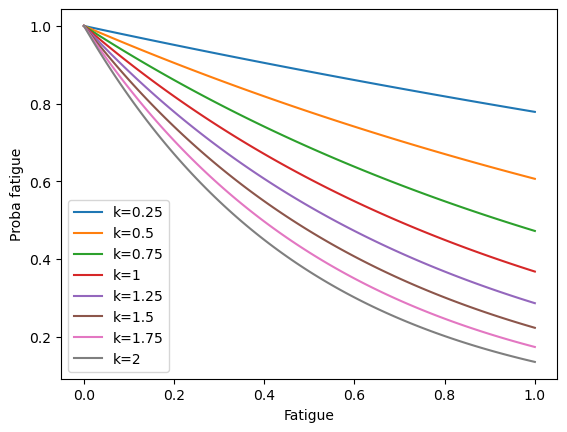

In [395]:
from matplotlib import pyplot as plt

for i in range(len(k_range)):
	plt.plot(f_norm, F[i], label=f"k={k_range[i]}")

plt.legend()
plt.xlabel("Fatigue")
plt.ylabel("Proba fatigue")
plt.show()